# Create Hosted Imagery Layers in ArcGIS Online

## Choose a method to connect to your ArcGIS Online GIS 

### Input URL, username, and password...

In [ ]:
import arcgis
from arcgis.gis import GIS
import getpass
from arcgis.raster.analytics import copy_raster

org_url = input('Enter ArcGIS Online Organization URL (e.g. https://your-org-name.maps.arcgis.com): ')
uname = input('Enter username: ')
pw = getpass.getpass('Enter password: ')
gis = GIS(org_url, uname, pw, verify_cert=False)

### ...or if running this notebook in ArcGIS Pro, use the current ArcGIS Online portal connection

In [ ]:
from arcgis.gis import GIS
from arcgis.raster.analytics import copy_raster
gis = GIS('pro', trust_env=True)

### Verify the version of arcgis module that is being used, and set Python environment to verbose output

In [ ]:
import arcgis
print(arcgis.__version__)
arcgis.env.verbose = True

## Publish Hosted Imagery Layers in a variety of configurations

### Create a Tiled Imagery layer from a Pleiades-1 order from OneAtlas Data. Using a simple directory path as string

In [ ]:
copy_raster_op = copy_raster(input_raster="Z:\\data\\Airbus\\OAD\\PHR1A_acq20200718_del5663145e", 
                             output_name="PHR1A_IndianCanyons_MS_TIL", 
                             raster_type_name="Pleiades-1",
                             raster_type_params={"productType": "ORTHO DISPLAY",
                                             "processingTemplate": "Multispectral Display"},
                             tiles_only=True)

### View the Tiled Imagery layer

In [ ]:
copy_raster_op.layers[0]

### Create a Dynamic Imagery layer from a Pleiades-1 order from OneAtlas Data. Using a simple directory path as string

In [ ]:
copy_raster_op = copy_raster(input_raster="Z:\\data\\Airbus\\OAD\\PHR1A_acq20200718_del5663145e", 
                             output_name="PHR1A_IndianCanyons_MS_DIL", 
                             raster_type_name="Pleiades-1",
                             raster_type_params={"productType": "ORTHO DISPLAY",
                                             "processingTemplate": "Multispectral Display"},
                             tiles_only=False)

### Create a Tiled Imagery layer from a list of SPOT 6 product directories - source is ORTHO REFLECTANCE, applying the Multispectral Reflectance processing template

In [ ]:
from arcgis.gis import GIS
from arcgis.raster.analytics import copy_raster

copy_raster_op = copy_raster(input_raster=['Z:\\data\\Airbus\\OAD\\SPOT6_acq20201029_del7d9bd776', 'Z:\\data\\Airbus\\OAD\\SPOT6_acq20201029_delfcf719e9'], 
                             output_name="Two_SPOT6_scenes_MS_TIL", 
                             raster_type_name="SPOT 6",
                             raster_type_params={"productType": "ORTHO REFLECTANCE",
                                             "processingTemplate": "Multispectral Reflectance"},
                             tiles_only=True)

### View the Tiled Imagery layer

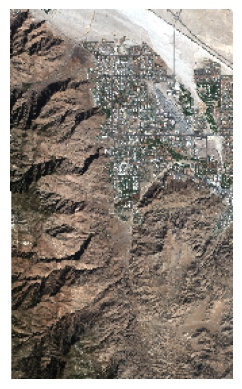

In [14]:
copy_raster_op.layers[0]

### input_raster can also be a list containing only one product folder

In [ ]:
copy_raster_op = copy_raster(input_raster=['Z:\\data\\Airbus\\OAD\\SPOT6_acq20201029_del7d9bd776'], 
                             output_name="One_SPOT6_scene_MS_TIL", 
                             raster_type_name="SPOT 6",
                             raster_type_params={"productType": "ORTHO REFLECTANCE",
                                             "processingTemplate": "Multispectral Reflectance"},
                             tiles_only=True)

### Create a Dynamic Imagery layer from a SPOT 7 product directory - source is ORTHO REFLECTANCE, applying the Multispectral Reflectance processing template

In [ ]:
copy_raster_op = copy_raster(input_raster=['Z:\\data\\Airbus\\OAD\\SPOT7_acq20181121_del568779be'], 
                             output_name="SPOT7_MS_TIL", 
                             raster_type_name="SPOT 7",
                             raster_type_params={"productType": "ORTHO REFLECTANCE",
                                             "processingTemplate": "Multispectral Reflectance"},
                             tiles_only=True)

### View the SPOT7 Tiled Imagery layer

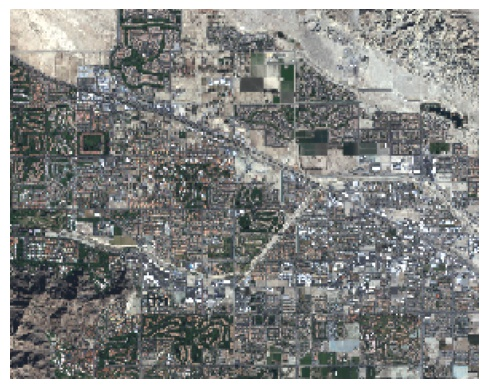

In [30]:
copy_raster_op.layers[0]

### Create a Dynamic Imagery layer from a list of SPOT 6 product directories - source is ORTHO REFLECTANCE, applying the Multispectral Reflectance processing template

In [ ]:
copy_raster_op = copy_raster(input_raster=['Z:\\data\\Airbus\\OAD\\SPOT6_acq20201029_del7d9bd776', 'Z:\\data\\Airbus\\OAD\\SPOT6_acq20201029_delfcf719e9'], 
                             output_name="Two_SPOT6_scenes_MS_DIL", 
                             raster_type_name="SPOT 6",
                             raster_type_params={"productType": "ORTHO REFLECTANCE",
                                             "processingTemplate": "Multispectral Reflectance"},
                             tiles_only=False)

### Create a Tiled Imagery layer from a single Pleiades product directory - source is ORTHO DISPLAY, applying the Pansharpen Display processing template, band information, and more

In [ ]:
copy_raster_op = copy_raster(input_raster="Z:\\data\\Airbus\\OAD\\PHR1A_acq20200718_del5663145e", 
                             output_name="PHR1A_PS_TIL", 
                             raster_type_name="Pleiades-1",
                             tiles_only=True,
                             raster_type_params={"productType":"ORTHO DISPLAY",
                                                 "processingTemplate":"Pansharpen Display"},
                             context={"outSR":{"wkid":3857},
                                      "pansharpenType":"Gram-Schmidt",
                                      "filter":"SharpenMore",
                                      "pansharpenWeights":"0.9 0.75 0.5 0.5",
                                      "constantZ":-9999,
                                      "resamplingMethod":"BILINEAR",
                                      "compression":"LERC 0",
                                      "bandMapping":[{"bandName":"Red","wavelengthMin":620,"wavelengthMax":700},
                                                     {"bandName":"Green","wavelengthMin":510,"wavelengthMax":590},
                                                     {"bandName":"Blue","wavelengthMin":450,"wavelengthMax":530},
                                                     {"bandName":"NearInfrared","wavelengthMin":775,"wavelengthMax":915}],
                                      "buildFootprints":True,
                                      "footprintsArguments":{"method":"RADIOMETRY",
                                                             "minValue":1,
                                                             "maxValue":None,
                                                             "shrinkDistance":50,
                                                             "skipOverviews":True,
                                                             "updateBoundary":True,
                                                             "maintainEdge":False,
                                                             "simplification":"None",
                                                             "numVertices":20,
                                                             "minThinnessRatio":0.05,
                                                             "maxSliverSize":20,
                                                             "requestSize":2000,
                                                             "minRegionSize":100}})

### Create a Dynamic Imagery layer from a single Pleiades product directory - source is ORTHO REFLECTANCE, applying the Pansharpen Reflectance processing template, band information, and more

In [ ]:
copy_raster_op = copy_raster(input_raster="Z:\\data\\Airbus\\OAD\\PHR1A_acq20190405_del3a09f1b2", 
                             output_name="PHR1A_PS_DIL", 
                             raster_type_name="Pleiades-1",
                             tiles_only=False,
                             raster_type_params={"productType":"ORTHO DISPLAY",
                                                 "processingTemplate":"Pansharpen Display"},
                             context={"outSR":{"wkid":3857},
                                      "pansharpenType":"Gram-Schmidt",
                                      "filter":"SharpenMore",
                                      "pansharpenWeights":"0.9 0.75 0.5 0.5",
                                      "constantZ":-9999,
                                      "resamplingMethod":"BILINEAR",
                                      "compression":"LERC 0",
                                      "bandMapping":[{"bandName":"Red","wavelengthMin":620,"wavelengthMax":700},
                                                     {"bandName":"Green","wavelengthMin":510,"wavelengthMax":590},
                                                     {"bandName":"Blue","wavelengthMin":450,"wavelengthMax":530},
                                                     {"bandName":"NearInfrared","wavelengthMin":775,"wavelengthMax":915}],
                                      "buildFootprints":True,
                                      "footprintsArguments":{"method":"RADIOMETRY",
                                                             "minValue":1,
                                                             "maxValue":None,
                                                             "shrinkDistance":50,
                                                             "skipOverviews":True,
                                                             "updateBoundary":True,
                                                             "maintainEdge":False,
                                                             "simplification":"None",
                                                             "numVertices":20,
                                                             "minThinnessRatio":0.05,
                                                             "maxSliverSize":20,
                                                             "requestSize":2000,
                                                             "minRegionSize":100}})

### Create a Dynamic Imagery layer as an Image Collection from a single Pleiades-1 product directory - source is ORTHO REFLECTANCE, applying the Pansharpen Reflectance processing template, and building overviews

In [ ]:
from arcgis.raster.analytics import create_image_collection

create_image_collection_layer = create_image_collection(image_collection="PHR1A_PS_DIL_IC", 
                                                        input_rasters="Z:\\data\\Airbus\\OAD\\PHR1A_acq20200718_deledc06a5c",
                                                        raster_type_name="Pleiades-1",
                                                        tiles_only=False,
                                                        raster_type_params={"productType":"ORTHO REFLECTANCE",
                                                                            "processingTemplate":"Pansharpen Reflectance"},
                                                        context={"outSR":{"wkid":3857},
                                                                 "pansharpenType":"Gram-Schmidt",  
                                                                 "filter":"SharpenMore",                                                  
                                                                 "pansharpenWeights":"0.9 0.75 0.5 0.5",
                                                                 "constantZ":-9999,
                                                                 "bandMapping":[{"bandName":"Red","wavelengthMin":620,"wavelengthMax":700},
                                                                                {"bandName":"Green","wavelengthMin":510,"wavelengthMax":590},
                                                                                {"bandName":"Blue","wavelengthMin":450,"wavelengthMax":530},
                                                                                {"bandName":"NearInfrared","wavelengthMin":775,"wavelengthMax":915}],
                                                                 "buildFootprints":True,
                                                                 "footprintsArguments":{"method":"RADIOMETRY",
                                                                                        "minValue":1,
                                                                                        "maxValue":None,
                                                                                        "shrinkDistance":50,
                                                                                        "skipOverviews":True,
                                                                                        "updateBoundary":True,
                                                                                        "maintainEdge":False,
                                                                                        "simplification":"None",
                                                                                        "numVertices":20,
                                                                                        "minThinnessRatio":0.05,
                                                                                        "maxSliverSize":20,
                                                                                        "requestSize":2000,
                                                                                        "minRegionSize":100},
                                                                 "buildOverview":True})

In [ ]:
# for Pleiades Neo
"bandMapping":[{"bandName":"DeepBlue","wavelengthMin":400,"wavelengthMax":450},
               {"bandName":"Blue","wavelengthMin":450,"wavelengthMax":520},
               {"bandName":"Green","wavelengthMin":530,"wavelengthMax":590},
               {"bandName":"Red","wavelengthMin":620,"wavelengthMax":690},
               {"bandName":"RedEdge","wavelengthMin":700,"wavelengthMax":750},
               {"bandName":"NearInfrared","wavelengthMin":770,"wavelengthMax":880}]

### View the Image Collection layer

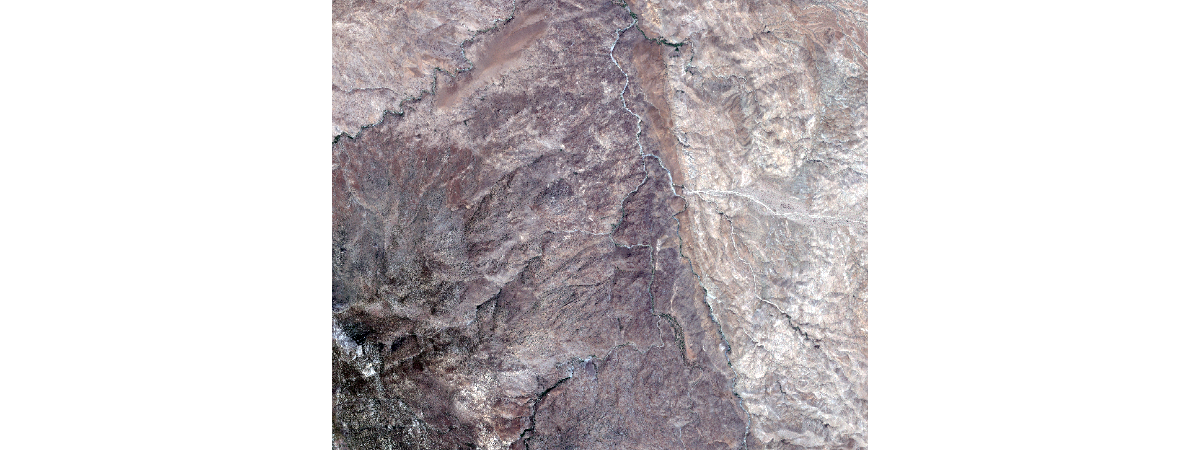

In [26]:
create_image_collection_layer.layers[0]